In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("scores.txt", names=['dimCount', 'scores', 'eps'], sep=";")

df.head()

,dimCount,scores,eps
0,0,0,0
1,1,"0.82909,0.999907,0.87988,0.999775,0.931417,0.9...","0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.01..."
2,2,"0.181818,0.839522,0.499939,0.999925,0.575015,0...","0.015,0.015,0.015,0.015,0.015,0.015,0.015"
3,3,0,0
4,4,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dimCount  200 non-null    int64 
 1   scores    200 non-null    object
 2   eps       200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [13]:
df['scores'] = df['scores'][df['scores'] != '0']
df['eps'] = df['eps'][df['eps'] != '0']
df = df.dropna()

In [14]:
df.head(30)

,dimCount,scores,eps
1,1,"0.82909,0.999907,0.87988,0.999775,0.931417,0.9...","0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.01..."
2,2,"0.181818,0.839522,0.499939,0.999925,0.575015,0...","0.015,0.015,0.015,0.015,0.015,0.015,0.015"


In [15]:
df['scores'] = df['scores'].map(lambda a: a.split(','))
df['eps'] = df['eps'].map(lambda a: a.split(','))

In [16]:
df['scores'] = df['scores'].map(lambda a: np.array(a).astype(float))
df['eps'] = df['eps'].map(lambda a: np.array(a).astype(float))

In [17]:
df.head()

,dimCount,scores,eps
1,1,"[0.82909, 0.999907, 0.87988, 0.999775, 0.93141...","[0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.0..."
2,2,"[0.181818, 0.839522, 0.499939, 0.999925, 0.575...","[0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015]"


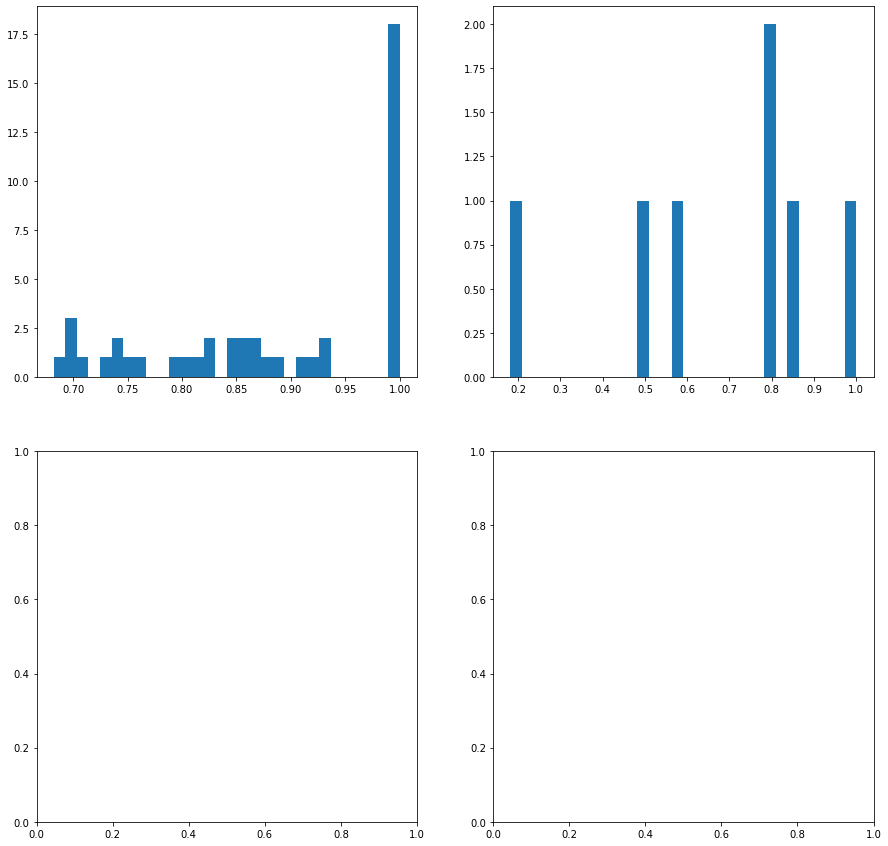

In [18]:
nEntries = df.shape[0]
plotsPerRow = 4
if plotsPerRow > nEntries:
    plotsPerRow = nEntries

fig, axs = plt.subplots(int(nEntries / plotsPerRow + 1), plotsPerRow, figsize=(15, 15))

i = 0

for index, row in df.T.iteritems():
    axs[int(i / plotsPerRow), int(i % plotsPerRow)].hist(row['scores'], bins=30)

    i = i + 1

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 52.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.485, -0.465, -0.445, -0.425, -0.405, -0.385, -0.365, -0.345,
        -0.325, -0.305, -0.285, -0.265, -0.245, -0.225, -0.205, -0.185,
        -0.165, -0.145, -0.125, -0.105, -0.085, -0.065, -0.045, -0.025,
        -0.005,  0.015,  0.035,  0.055,  0.075,  0.095,  0.115,  0.135,
         0.155,  0.175,  0.195,  0.215,  0.235,  0.255,  0.275,  0.295,
         0.315,  0.335,  0.355,  0.375,  0.395,  0.415,  0.435,  0.455,
         0.475,  0.495,  0.515]),
 <BarContainer object of 50 artists>)

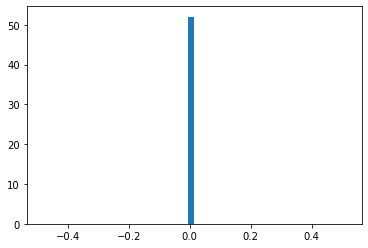

In [19]:
epsilons = []

for date, eps in df.iterrows():
    epsilons.extend(eps['eps'])

plt.hist(epsilons, bins=50)

In [20]:
counter = 0

for scores in df['scores']:
    counter = counter + len(scores)

print("Total Scores: " + str(counter))

Total Scores: 52
